## Find the flag


### Supervised learning: advanced classification

Source of the data: https://archive.ics.uci.edu/ml/datasets/Flags

In [1]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

First step: import the data

In [3]:
flags = pd.read_csv('flags.csv', header=0)

In [4]:
flags.columns

Index(['Name', 'Landmass', 'Zone', 'Area', 'Population', 'Language',
       'Religion', 'Bars', 'Stripes', 'Colors', 'Red', 'Green', 'Blue', 'Gold',
       'White', 'Black', 'Orange', 'Mainhue', 'Circles', 'Crosses', 'Saltires',
       'Quarters', 'Sunstars', 'Crescent', 'Triangle', 'Icon', 'Animate',
       'Text', 'Topleft', 'Botright'],
      dtype='object')

In [5]:
flags.head()

,Name,Landmass,Zone,Area,Population,Language,Religion,Bars,Stripes,Colors,...,Saltires,Quarters,Sunstars,Crescent,Triangle,Icon,Animate,Text,Topleft,Botright
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red


In [8]:
flags[flags['Name']=='Andorra']

,Name,Landmass,Zone,Area,Population,Language,Religion,Bars,Stripes,Colors,...,Saltires,Quarters,Sunstars,Crescent,Triangle,Icon,Animate,Text,Topleft,Botright
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red


In [10]:
labels = flags[['Landmass']]
labels.head()

,Landmass
0,5
1,3
2,4
3,6
4,3


In [40]:
data = flags[['Red', 'Green', 'Blue', 'Gold', 'White', 'Black', 'Orange']]

In [41]:
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, random_state=1)

### Baseline model

In [42]:
tree = DecisionTreeClassifier(random_state=1)

In [43]:
tree.fit(train_data, train_labels)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [44]:
tree.score(test_data, test_labels)

0.3469387755102041

### Optimising the model

In [45]:
def plotScores(scores):
    plt.plot(range(1, 21), scores)
    plt.xlabel('max_depth')
    plt.ylabel('score')
    plt.show()

In [46]:
def optimiseModel(data, labels):
    train_data, test_data, train_labels, test_labels = train_test_split(data, labels, random_state=1)
    scores = []
    for i in range(1, 21):
        tree = DecisionTreeClassifier(random_state=1, max_depth=i)
        tree.fit(train_data, train_labels)
        scores.append(tree.score(test_data, test_labels))
    plotScores(scores)

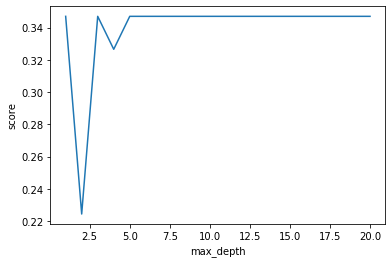

In [47]:
optimiseModel(data, labels)

Depth of the tree doesn't have a real impact on our score, so we need to add more features dealing with the shapes of our flag.

### Adding more features to optimise our model

In [49]:
data = flags[['Red', 'Green', 'Blue', 'Gold', 'White', 'Black', 'Orange', 'Circles', 'Crosses', 'Saltires',
       'Quarters', 'Sunstars', 'Crescent', 'Triangle']]
data.head()

,Red,Green,Blue,Gold,White,Black,Orange,Circles,Crosses,Saltires,Quarters,Sunstars,Crescent,Triangle
0,1,1,0,1,1,1,0,0,0,0,0,1,0,0
1,1,0,0,1,0,1,0,0,0,0,0,1,0,0
2,1,1,0,0,1,0,0,0,0,0,0,1,1,0
3,1,0,1,1,1,0,1,0,0,0,0,0,0,1
4,1,0,1,1,0,0,0,0,0,0,0,0,0,0


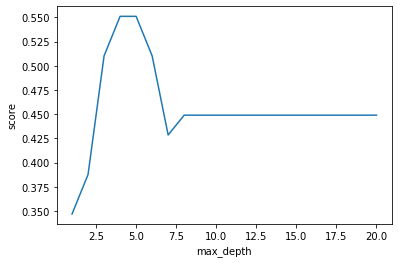

In [50]:
optimiseModel(data, labels)